# Distance and similarity functions

In [5]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sklearn as sk
import sklearn.datasets as sk_data
import sklearn.metrics as metrics
import seaborn as sns

import time

%matplotlib inline

## Brief intro to numpy:  http://www.numpy.org/   or for more references: http://docs.scipy.org/doc/numpy/reference/index.html

### Why numpy?

In [3]:

def trad_version():
    t1 = time.time()
    X = range(10000000)
    Y = range(10000000)
    Z = []
    for i in range(len(X)):
        Z.append(X[i] + Y[i])
    return time.time() - t1

def numpy_version():
    t1 = time.time()
    X = np.arange(10000000)
    Y = np.arange(10000000)
    print Y.__class__
    Z = X + Y
    return time.time() - t1


traditional_time = trad_version()
numpy_time = numpy_version()
print "Traditional time = "+ str(traditional_time)
print "Numpy time       = "+ str(numpy_time)

<type 'numpy.ndarray'>
Traditional time = 3.74518013
Numpy time       = 0.10237288475


### Arrays in numpy

In [3]:
#1-dimensional arrays
x = np.array([2,5,18,14,4])
print "\n Deterministic 1-dimensional array \n"
print x

x = np.random.rand(5)
print "\n Random 1-dimensional array \n"
print x

#2-dimensional arrays
x = np.array([[2,5,18,14,4], [12,15,1,2,8]])
print "\n Deterministic 2-dimensional array \n"
print x

x = np.random.rand(5,5)
print "\n Random 2-dimensional array \n"
print x
print x.shape




 Deterministic 1-dimensional array 

[ 2  5 18 14  4]

 Random 1-dimensional array 

[ 0.37318305  0.75473645  0.69960011  0.10572232  0.74161626]

 Deterministic 2-dimensional array 

[[ 2  5 18 14  4]
 [12 15  1  2  8]]

 Random 2-dimensional array 

[[ 0.82366518  0.26005906  0.55784907  0.36843834  0.12034315]
 [ 0.12945801  0.09778151  0.36087513  0.0139502   0.15365142]
 [ 0.14470754  0.19345928  0.21816211  0.40923157  0.07808364]
 [ 0.38329596  0.40119625  0.29307077  0.40794803  0.28003193]
 [ 0.04214938  0.95158728  0.95561658  0.81293864  0.75176702]]
(5, 5)


### Manipulating and aggregating arrays

In [4]:
x = np.random.rand(5)
print x
print x+1

[ 0.51231998  0.39993242  0.95422476  0.99436342  0.98437701]
[ 1.51231998  1.39993242  1.95422476  1.99436342  1.98437701]


### Aggregates

In [5]:
x = np.random.rand(2,4)
print x
print np.mean(x)
print np.mean(x,0)
print np.std(x)
print np.std(x,1)
print np.median(x)
print np.median(x,1)
print np.sum(x)
print np.sum(x,1)
print np.prod(x)
print np.prod(x,1)

[[ 0.35353463  0.46230113  0.47181524  0.09434082]
 [ 0.13207979  0.37452351  0.75804946  0.28755098]]
0.366774445487
[ 0.24280721  0.41841232  0.61493235  0.1909459 ]
0.196554194838
[ 0.15226911  0.23059888]
0.364029068396
[ 0.40791788  0.33103725]
2.9341955639
[ 1.38199182  1.55220374]
7.84433957759e-05
[ 0.00727493  0.01078271]


## Generating synthetic data

Random data are the simplest data one can generate. Other types of data following different distributions can be generated with functions extensively discussed below.

http://docs.scipy.org/doc/numpy/reference/routines.random.html

In [29]:
A = np.random.rand(2,15)
print (A)

[[ 0.27215084  0.94692343  0.78443409  0.19544982  0.05041448  0.61065478
   0.51958999  0.15920951  0.86860244  0.29424189  0.24365156  0.73844486
   0.36355929  0.92134869  0.47005161]
 [ 0.60202578  0.70425096  0.13564059  0.36786983  0.25914073  0.88875673
   0.97645442  0.14410199  0.41126731  0.62254081  0.09480631  0.47718279
   0.70618066  0.58148264  0.81488283]]


In [30]:
B = np.random.randint(2,size = (2,15))
print B

[[0 0 1 0 1 0 0 1 0 1 0 1 0 1 0]
 [0 0 0 0 1 1 1 1 0 0 0 0 0 1 0]]


#### Euclidean distance

In [31]:
D = np.sqrt(np.sum(np.square(A[0,:]-A[1,:])))
print D

1.30666945563


In [32]:
def my_euclidean_dist(x,y):
    return np.sqrt(np.sum(np.square(x-y)))

In [33]:
d1 = my_euclidean_dist(A[0,:],A[1,:])
d2 = my_euclidean_dist(B[0,:],B[1,:])
print d1
print d2

1.30666945563
2.2360679775


### Becoming more effective and efficient using scikit-learn, a set of libraries for data mining, data analysis and machine learning  http://scikit-learn.org/stable/

Generating data with specific structure using **sklearn.datasets**

[[  6.74239338   2.48469222]
 [  2.03334367  13.29826448]
 [  7.11305453   2.53798089]
 [  1.31491239  12.6986217 ]
 [  1.88025727  11.49134405]
 [  2.58089809  13.06771095]
 [ -5.72818069   8.31582674]
 [ -3.63129123   8.84119803]
 [  6.83809732   3.10045282]
 [  2.29448814  12.54862082]
 [  3.6579008   13.04034489]
 [  4.15910092  14.11374183]
 [  6.631465     1.15674729]
 [  4.46158945  14.38072075]
 [ -5.32546686   7.92720825]
 [  8.03336152   3.59903564]
 [ -4.67916456   8.0901685 ]
 [  2.11566395  11.18507938]
 [ -4.64895364  10.46698951]
 [ -5.68509538   8.80581186]
 [ -5.22433044   6.53024363]
 [ -4.61999486   7.58555329]
 [ -3.94058051   7.13669074]
 [  2.04102449  10.93056551]
 [  5.09504994   3.74744271]
 [  6.29271466   3.09498034]
 [  5.39588649   3.23224017]
 [  5.00065272   3.59381747]
 [ -4.94989388   8.51426761]
 [ -3.80892149   9.57715094]
 [  3.07285381  14.36563549]
 [  7.65405476   4.58888016]
 [  5.75218358   1.94553617]
 [  4.42288931  12.70620372]
 [ -5.03624454

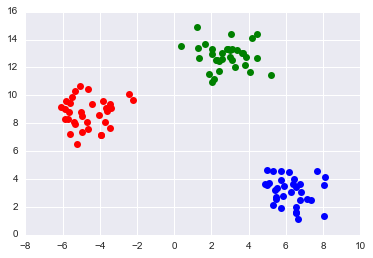

In [21]:
X, y = sk_data.make_blobs(n_samples=100, centers=3, n_features=2,center_box=(-30.0, 30.0),random_state=0)
print X
print  y, type(X) , type(y)

plt.plot(X[y==1,0],X[y==1,1],'bo')
plt.plot(X[y==0,0],X[y==0,1],'go')
plt.plot(X[y==2,0],X[y==2,1],'ro')

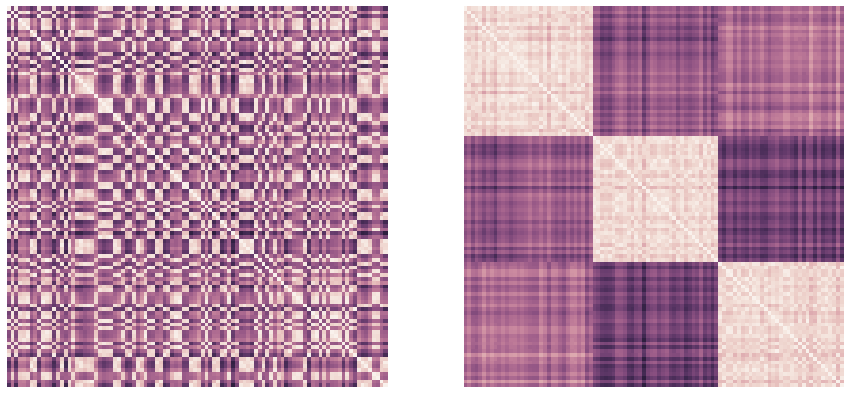

In [26]:
euclidean_dists = metrics.euclidean_distances(X)
# print euclidean_dists.shape

z = y
idx = np.argsort(z)[:]
rearranged_dists = euclidean_dists[idx,:][:,idx]


# Plot the matrices in a single row, using fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,10))
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,10))
sns.heatmap(euclidean_dists, xticklabels=False, yticklabels=False, linewidths=0, ax=ax1, square=True, cbar=False)
sns.heatmap(rearranged_dists, xticklabels=False, yticklabels=False, linewidths=0, ax=ax2, square=True, cbar=False)



Another way of generating data using **sklearn.datasets**

[[  5.89718533e+01   6.03781776e+01   6.00262746e+01 ...,  -2.39709901e-01
    1.55681752e-01  -3.88010233e-01]
 [  5.92395329e+01   5.92099534e+01   5.99530713e+01 ...,   8.80420357e-04
   -4.95080071e-01   9.36197039e-01]
 [  5.92726786e+01   5.94198878e+01   5.99086233e+01 ...,   1.14216668e+00
    7.82051290e-01   3.05551855e-01]
 ..., 
 [  9.85644040e-03  -2.35736479e-01  -7.00987720e-01 ...,   7.49520048e+01
    7.44567691e+01   7.45986937e+01]
 [ -4.17818601e-01   3.16029715e-01  -2.37552689e-01 ...,   7.42803974e+01
    7.48371418e+01   7.47227021e+01]
 [  1.31476068e-01  -7.90392506e-01   1.18198665e+00 ...,   7.46622864e+01
    7.39767960e+01   7.36930067e+01]]


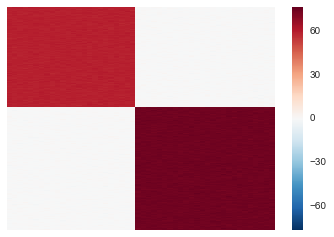

In [15]:
data, rows, columns = sk_data.make_biclusters(
    shape=(300, 50), n_clusters=2, noise=0.5,
    shuffle=False, random_state=0)
#data[data>5] = 1
sns.heatmap(data, xticklabels=False, yticklabels=False, linewidths=0)
print data
# print data.shape


(array([  7.46800000e+03,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   3.20900000e+03,   7.00000000e+00,
          4.31600000e+03]),
 array([ -1.91247007,   5.92647351,  13.76541709,  21.60436068,
         29.44330426,  37.28224785,  45.12119143,  52.96013501,
         60.7990786 ,  68.63802218,  76.47696576]),
 <a list of 10 Patch objects>)

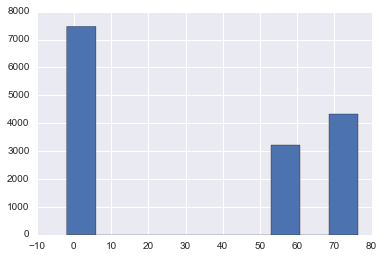

In [14]:
newd = np.reshape(data,data.shape[0]*data.shape[1])
plt.hist(newd)


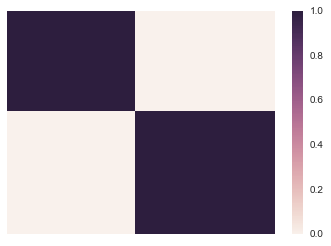

In [15]:
data[data<40] = 0
data[data>=40] = 1
sns.heatmap(data, xticklabels=False, yticklabels=False, linewidths=0)

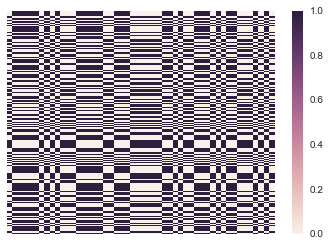

In [16]:

shuffled_data, row_idx = sk.utils.shuffle(data, np.arange(data.shape[0]), random_state=100)
shuffled_data, col_idx = sk.utils.shuffle(shuffled_data.T, np.arange(data.shape[1]), random_state=100)
shuffled_data = shuffled_data.T
sns.heatmap(shuffled_data, xticklabels=False, yticklabels=False, linewidths=0)



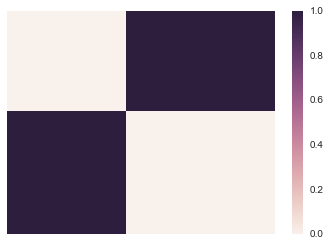

In [17]:
jacc_dists = metrics.pairwise_distances(data,Y=None,metric='jaccard', n_jobs=1)

sns.heatmap(jacc_dists, xticklabels=False, yticklabels=False, linewidths=0)



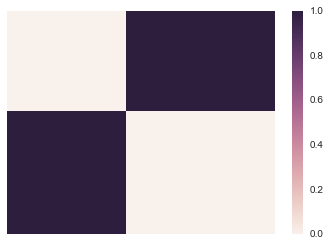

In [18]:
jacc_dists = metrics.pairwise_distances(shuffled_data,Y=None,metric='jaccard', n_jobs=1)


y = [ row_idx.tolist().index(i) for i in range(len(row_idx))]

rearranged_dists = jacc_dists[y,:][:,y]


sns.heatmap(rearranged_dists, xticklabels=False, yticklabels=False, linewidths=0)



We can compute pairwise distances using the **sklearn.metrics** functions summarized here:
http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [ ]:
# Code for setting the style of the notebook
from IPython.core.display import HTML
def css_styling():
    styles = open("../theme/custom.css", "r").read()
    return HTML(styles)
css_styling()